In [1]:
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.realpath("main.ipynb"))))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from backtesting import Backtest

from reinforcement.agent import Model
from etl_data_preparing import DataPrepareETL
from strategies import SMAStrategy, AgentBasedStrategy
from datetime import timedelta

/Users/the2rock/Documents/MyProjects/Mastery-Trading/reinforcement/policy_network.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(path, map_location=

In [2]:
etl = DataPrepareETL(
    data="../reinforcement/static/BTCUSDT 1H.csv"
)
data = etl.prepare()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60941 entries, 2017-08-17 09:00:00 to 2024-08-06 09:00:00
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open              60941 non-null  float64
 1   High              60941 non-null  float64
 2   Low               60941 non-null  float64
 3   Close             60941 non-null  float64
 4   number_of_trades  60941 non-null  float64
 5   Volume            60941 non-null  float64
 6   cluster           60941 non-null  float64
 7   prediction        60941 non-null  float64
 8   RSI               60941 non-null  float64
 9   OBV               60941 non-null  float64
 10  price_change      60941 non-null  float64
dtypes: float64(11)
memory usage: 5.6 MB


In [3]:
data.describe()

,Open,High,Low,Close,number_of_trades,Volume,cluster,prediction,RSI,OBV,price_change
count,60941.000000,60941.000000,60941.000000,60941.000000,6.094100e+04,60941.000000,60941.000000,60941.000000,60941.000000,60941.000000,60941.000000
mean,24274.567648,24392.081257,24149.769420,24275.406072,6.117088e+04,2935.718385,0.425271,0.579966,0.485658,0.517545,0.007557
std,18955.083552,19039.871580,18864.712631,18955.338933,9.005350e+04,4197.658299,0.363938,0.023121,0.128523,0.248284,0.831845
min,2870.900000,2950.000000,2817.000000,2919.000000,1.200000e+01,0.860601,0.000000,0.000000,0.000000,0.000000,-18.211473
25%,8238.650000,8286.280000,8200.000000,8239.500000,1.255900e+04,926.556588,0.000000,0.572366,0.404338,0.300051,-0.259650
50%,18934.220000,19042.420000,18818.310000,18933.620000,3.133300e+04,1617.965890,0.428571,0.580019,0.485559,0.417608,0.008402
75%,37937.070000,38185.800000,37725.740000,37937.790000,6.758100e+04,3130.051720,0.857143,0.587831,0.565613,0.714587,0.279017
max,73577.350000,73777.000000,73215.140000,73577.350000,1.442097e+06,137207.188600,1.000000,1.000000,1.000000,1.000000,17.383989


In [24]:
main_data = data.copy()

In [29]:
data = main_data.copy()
data = data[(data.index >= "2023-01-01") & (data.index <= "2024-01-01")]

In [30]:
cash = 100_000
commission = 0.0005

In [31]:
sma_backtest = Backtest(data, SMAStrategy, cash=cash, commission=commission)
sma_stats = sma_backtest.run()
print(sma_stats)

Start                     2023-01-01 00:00:00
End                       2024-01-01 00:00:00
Duration                    365 days 00:00:00
Exposure Time [%]                   99.977164
Equity Final [$]                286692.653805
Equity Peak [$]                  287055.93823
Return [%]                         186.692654
Buy & Hold Return [%]              155.785764
Return (Ann.) [%]                  185.784623
Volatility (Ann.) [%]               19.524378
Sharpe Ratio                         9.515521
Sortino Ratio                      191.089818
Calmar Ratio                        194.33007
Max. Drawdown [%]                   -0.956026
Avg. Drawdown [%]                   -0.090968
Max. Drawdown Duration        6 days 10:00:00
Avg. Drawdown Duration        0 days 10:00:00
# Trades                                 1564
Win Rate [%]                        59.590793
Best Trade [%]                      11.923165
Worst Trade [%]                     -0.989497
Avg. Trade [%]                    

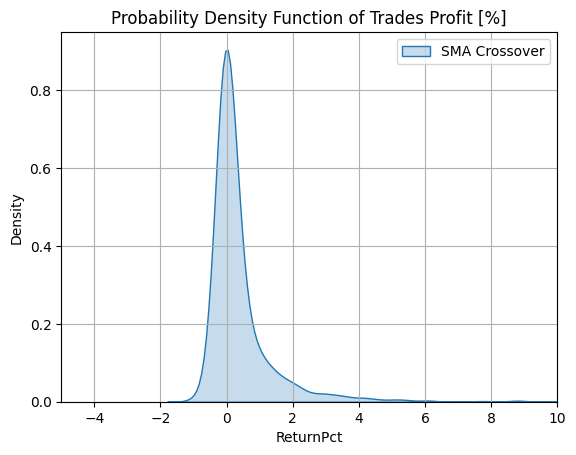

In [37]:
sns.kdeplot(data=sma_stats._trades.ReturnPct*100, fill=True, label="SMA Crossover")
plt.grid()
plt.xlim(-5, 10)
plt.title("Probability Density Function of Trades Profit [%]")
plt.legend()
plt.savefig("SMA Profit PDF")

In [33]:
agent_backtest = Backtest(data, AgentBasedStrategy, cash=cash, commission=commission)
agent_stats = agent_backtest.run()
print(agent_stats)

Start                     2023-01-01 00:00:00
End                       2024-01-01 00:00:00
Duration                    365 days 00:00:00
Exposure Time [%]                   84.791048
Equity Final [$]               1130215.020785
Equity Peak [$]                 1130236.30115
Return [%]                        1030.215021
Buy & Hold Return [%]              155.785764
Return (Ann.) [%]                  1022.56402
Volatility (Ann.) [%]              217.715199
Sharpe Ratio                         4.696797
Sortino Ratio                   543612.000632
Calmar Ratio                      2656.490289
Max. Drawdown [%]                    -0.38493
Avg. Drawdown [%]                   -0.006722
Max. Drawdown Duration        0 days 20:00:00
Avg. Drawdown Duration        0 days 03:00:00
# Trades                                 5668
Win Rate [%]                        97.035992
Best Trade [%]                      11.992441
Worst Trade [%]                     -0.451728
Avg. Trade [%]                    

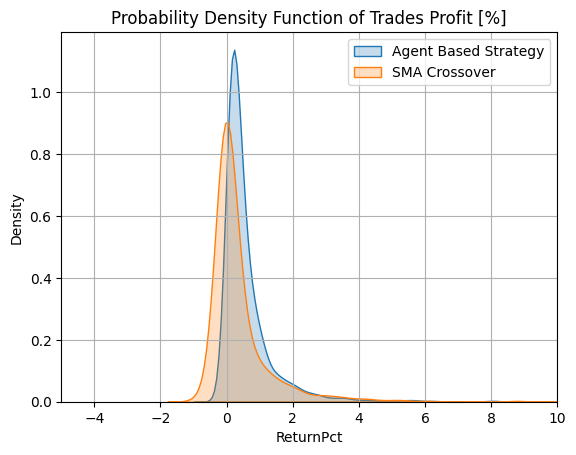

In [42]:
sns.kdeplot(data=agent_stats._trades.ReturnPct*100, fill=True, label="Agent Based Strategy")
sns.kdeplot(data=sma_stats._trades.ReturnPct*100, fill=True, label="SMA Crossover")
plt.grid()
plt.xlim(-5, 10)
plt.title("Probability Density Function of Trades Profit [%]")
plt.legend()
plt.savefig("Comparing Profit PDF")

In [10]:
agent_p_stats._trades

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
0,-1,2,3,4331.153340,4360.69,-29.536660,-0.006820,2017-08-17 11:00:00,2017-08-17 12:00:00,0 days 01:00:00
1,1,3,4,4362.870345,4441.10,78.229655,0.017931,2017-08-17 12:00:00,2017-08-17 13:00:00,0 days 01:00:00
2,-1,6,7,4425.086350,4411.00,14.086350,0.003183,2017-08-17 15:00:00,2017-08-17 16:00:00,0 days 01:00:00
3,-1,5,7,4457.770000,4411.00,46.770000,0.010492,2017-08-17 14:00:00,2017-08-17 16:00:00,0 days 02:00:00
4,-1,4,7,4438.879450,4411.00,27.879450,0.006281,2017-08-17 13:00:00,2017-08-17 16:00:00,0 days 03:00:00
...,...,...,...,...,...,...,...,...,...,...
48140,1,60936,60937,55751.851995,55845.44,93.588005,0.001679,2024-08-06 05:00:00,2024-08-06 06:00:00,0 days 01:00:00
48141,-1,60938,60939,55637.897135,55493.97,143.927135,0.002587,2024-08-06 07:00:00,2024-08-06 08:00:00,0 days 01:00:00
48142,-1,60937,60939,55817.517280,55493.97,323.547280,0.005797,2024-08-06 06:00:00,2024-08-06 08:00:00,0 days 02:00:00
48143,1,60939,60940,55521.716985,55925.96,404.243015,0.007281,2024-08-06 08:00:00,2024-08-06 09:00:00,0 days 01:00:00


<Axes: >

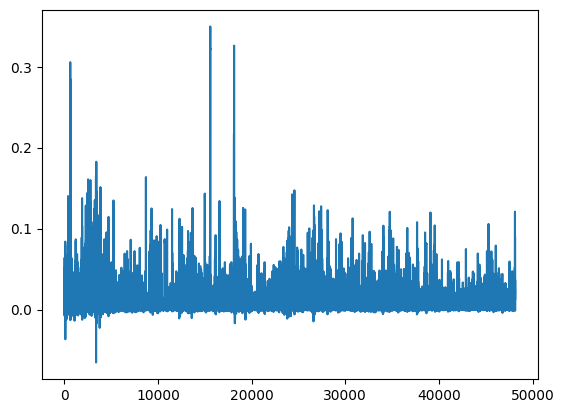

In [13]:
agent_p_stats._trades.ReturnPct.plot()